In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
x = insurance_df.drop('charges',axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [5]:
y = insurance_df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
x = pd.get_dummies(x,drop_first=True)
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:


model = tf.keras.Sequential([

    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x_train,y_train,epochs=100,verbose=0)

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                225       
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [19]:
y_pred = model.predict(x_test)
y_pred

9/9 [==============================] - 0s 881us/step


array([[16799.373 ],
       [11025.139 ],
       [25067.43  ],
       [17530.783 ],
       [ 6739.8945],
       [ 9851.393 ],
       [ 5203.4766],
       [21774.107 ],
       [ 9419.981 ],
       [18411.68  ],
       [12443.923 ],
       [14142.637 ],
       [ 8879.471 ],
       [17169.889 ],
       [21488.764 ],
       [17431.582 ],
       [16223.703 ],
       [17246.74  ],
       [16292.117 ],
       [16103.93  ],
       [ 9913.784 ],
       [14582.559 ],
       [ 5198.2476],
       [ 6506.0625],
       [19032.94  ],
       [18429.393 ],
       [20421.545 ],
       [ 9085.527 ],
       [17459.684 ],
       [ 5164.245 ],
       [15059.356 ],
       [19728.344 ],
       [ 6152.5913],
       [11604.852 ],
       [ 7474.5557],
       [13539.346 ],
       [ 6208.955 ],
       [14467.529 ],
       [20915.82  ],
       [12675.976 ],
       [ 7803.2183],
       [ 6612.8945],
       [19215.797 ],
       [21328.586 ],
       [10322.625 ],
       [21505.432 ],
       [ 7031.04  ],
       [ 8780

In [20]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8594.2812 - mae: 8594.2812


[8594.28125, 8594.28125]

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(x_train,y_train,epochs=100,verbose=0)

In [22]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                225       
                                                                 
 dense_9 (Dense)             (None, 50)                1300      
                                                                 
 dense_10 (Dense)            (None, 25)                1275      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 2,826
Trainable params: 2,826
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 12968.3174 - mae: 12968.3174


[12968.3173828125, 12968.3173828125]

In [26]:
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(x_train,y_train,epochs=250,verbose=0)

In [28]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                450       
                                                                 
 dense_17 (Dense)            (None, 100)               5100      
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 2647.3005 - mae: 2647.3005


[2647.300537109375, 2647.300537109375]

Model creation on scaled Data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

scaled_x_train,scaled_x_test


(array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.78316783,
         -0.59966106, -0.5723141 ],
        [ 0.54331294, -1.03308239, -0.91119211, ..., -0.56079971,
         -0.59966106, -0.5723141 ],
        [ 0.8987451 , -0.94368672, -0.91119211, ..., -0.56079971,
          1.66760869, -0.5723141 ],
        ...,
        [ 1.3252637 , -0.89153925, -0.91119211, ..., -0.56079971,
         -0.59966106, -0.5723141 ],
        [-0.16755139,  2.82086429,  0.73433626, ..., -0.56079971,
         -0.59966106,  1.74729228],
        [ 1.1120044 , -0.10932713, -0.91119211, ..., -0.56079971,
         -0.59966106,  1.74729228]]),
 array([[ 0.40114007, -0.89153925,  0.73433626, ..., -0.56079971,
         -0.59966106, -0.5723141 ],
        [-0.23863782, -0.08946143, -0.91119211, ...,  1.78316783,
         -0.59966106, -0.5723141 ],
        [ 1.75178229, -0.60845296, -0.91119211, ...,  1.78316783,
         -0.59966106, -0.5723141 ],
        ...,
        [-0.09646495, -0.41972876, -0.08842793, ..., -

In [33]:
new_model = tf.keras.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu'),

])

new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["mae"])

new_model.fit(scaled_x_train,y_train,epochs=250,verbose=0)

In [34]:
new_model.evaluate(scaled_x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3509.5813 - mae: 3509.5813


[3509.581298828125, 3509.581298828125]

In [39]:
y_pred = new_model.predict(scaled_x_test)
y_pred

9/9 [==============================] - 0s 1ms/step


array([[10756.382 ],
       [ 5946.1533],
       [33902.08  ],
       [11671.234 ],
       [34806.516 ],
       [ 5348.216 ],
       [ 3200.1592],
       [16325.862 ],
       [ 5252.3906],
       [12911.889 ],
       [29746.562 ],
       [ 8913.502 ],
       [ 4364.4487],
       [59521.266 ],
       [55946.785 ],
       [55263.008 ],
       [11330.217 ],
       [54916.06  ],
       [ 9350.532 ],
       [27098.994 ],
       [ 6003.2554],
       [ 8739.578 ],
       [ 1469.6421],
       [ 3053.855 ],
       [12642.637 ],
       [11214.041 ],
       [15153.996 ],
       [ 7305.561 ],
       [11300.269 ],
       [ 1432.8884],
       [ 9972.87  ],
       [12892.631 ],
       [ 2050.5432],
       [ 8125.3374],
       [ 2881.3477],
       [ 7413.9585],
       [ 2616.6702],
       [ 8699.663 ],
       [28187.002 ],
       [48275.31  ],
       [ 5984.6665],
       [ 3259.243 ],
       [14118.329 ],
       [13721.419 ],
       [ 4645.6426],
       [14651.14  ],
       [ 5367.036 ],
       [ 4864

In [37]:
new_model.save("final_NN_model.h5")

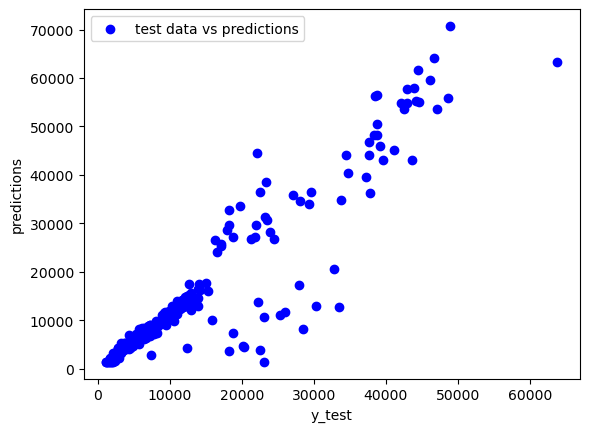

In [54]:

plt.scatter(x=y_test,y=y_pred,c="b",label="test data vs predictions")
plt.xlabel('y_test')
plt.ylabel('predictions')

plt.legend()

In [48]:
insurance_df_with_dummies = pd.get_dummies(insurance_df,drop_first=True)
insurance_df_with_dummies.corr()['charges']

age                 0.299008
bmi                 0.198341
children            0.067998
charges             1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64